###  UNIFOR - Mestrado em Inteligência Artificial e Ciência de Dados
### Disciplina: Análise de Dados em Grafos
#### Professor: Raimir
#### Equipe: Maurício Brito, João David e Tiago Pontes 

### Conceitos

A **densidade** é definida como o grau em que os nós da rede estão conectados uns aos outros. Ele pode ser usado como uma medida de quão perto uma rede está de ser concluída. No caso de um gráfico completo (um gráfico no qual todas as arestas possíveis estão presentes), a densidade é igual a um.

No âmbito da teoria dos grafos e da análise de redes, **centralidade** é uma medida de importância de um vértice em um grafo. Existem diferentes tipos de medidas de centralidade de um vértice num grafo que determinam a importância relativa, que permitem, por exemplo, estimar o quanto uma pessoa é influente dentro de uma rede social, o quão é importante uma sala dentro de um edifício e como é bem utilizada uma estrada dentro de uma rede urbana. Vários conceitos de centralidade foram primeiramente desenvolvidos na análise de redes sociais, e muitos dos termos usados para medir a centralidade refletem a sua origem sociológica.
Existem quatro medidas de centralidade que são amplamente utilizados na análise de rede: centralidade de grau, centralidade de intermediação, centralidade de proximidade e centralidade de vetor próprio.

**Centralidade de Grau**: É definido como o número de links incidentes em um nó. O grau pode ser interpretado como a probabilidade que o vértice tem de receber alguma informação da rede. Os valores de grau de centralidade são normalizados dividindo pelo grau máximo possível em um gráfico simples n-1 onde n é o número de nós em G.

**Centralidade de Proximidade**:Em grafos conectados existe uma distância natural métrica entre todos os pares de nós, definido pelo comprimento de seus caminhos mais curtos. O afastamento de um nó s é definido como a soma de suas distâncias para todos os outros nós, e sua proximidade é definida como o inverso do afastamento. Assim, quanto mais central é o nó, menor é a distância do seu total para todos os outros nós. Proximidade pode ser considerada como uma medida de rapidez, para determinar a velocidade que ela necessitará para difundir informações de s a todos os outros nós sequencialmente.

**Centralidade de Intermediação**: Centralidade de intermediação quantifica o número de vezes que um nó age como ponte ao longo do caminho mais curto entre dois outros nós.

**Centralidade de Autovetor**: É uma medida da influência de um nó numa rede. Ele atribui pontuações relativas a todos os nós da rede, baseada no conceito de que as ligações para os nós de alta pontuação contribuem mais para a pontuação do nó em questão do que ligações iguais a nós baixa pontuação. O sistema de PageRank do Google é uma variante da medida de centralidade de autovetor. Outra medida de centralidade relacionada é a centralidade de Katz.

**Centralidade de Katz e Sistema de PageRank**: A centralidade de Katz é uma generalização da centralidade de grau. Como a centralidade de grau mede o número de vizinhos diretos, a centralidade Katz mede o número de todos os nós que podem ser conectados através de um caminho, enquanto a contribuição de um nó distante é penalizado por um fator de atenuação.

Um problema potencial com a centralidade de Katz é o seguinte: se um nó com alta centralidade vincula muitos outros, todos os outros recebem alta centralidade. Em muitos casos, entretanto, significa menos se um nó for apenas um entre muitos a serem vinculados. A centralidade adquirida em virtude de receber um link de um nó importante deve ser diluída se o vértice importante for muito magnânimo com endossos.

O **PageRank** é um ajuste da centralidade de Katz que leva em consideração essa questão. Existem três fatores distintos que determinam o PageRank de um nó: (i) o número de links que ele recebe, (ii) a propensão do link dos linkers e (iii) a centralidade dos linkers. O primeiro fator não é surpreendente: quanto mais links um nó atrai, mais importante ele é percebido. Razoavelmente, o valor do endosso se deprecia proporcionalmente ao número de links emitidos pelo nó endossante: links vindos de nós parcimoniosos são mais valiosos do que aqueles emanados por perdulários. Finalmente, nem todos os nós são criados iguais: links de vértices importantes são mais valiosos do que links de vértices obscuros. Este método foi cunhado (e patenteado) por Sergey Brin e Larry Page.

Fonte: Wikipedia

#### Importa bibliotecas necessárias

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout
import matplotlib.pyplot as plt
from networkx.classes.function import density
from networkx.algorithms.centrality import degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
from networkx.algorithms import distance_measures
from networkx.algorithms.cluster import clustering
import operator

#### Função para ler arquivo txt para gerar o grafo

In [2]:
def ler_e_gera_grafo(file):
    G = nx.read_edgelist(file,create_using=nx.Graph(), nodetype = int)
    # Apresenta resumo do grafo
    str = nx.info(G).split('\n')
    print('---------------------------------------------')
    print('Grafo: ', file)
    print(str[2])
    print(str[3])
    
    print()
    print(str[4])
    graus_G = sorted(G.degree, key=lambda x: x[1], reverse=True)
    no_min_grau = graus_G[-1]
    no_max_grau = graus_G[0]
    print(f'O Nó {no_min_grau[0]} tem o menor grau ({no_min_grau[1]})')
    print(f'O Nó {no_max_grau[0]} tem o MAIOR grau ({no_max_grau[1]})')
    
    print()
    print(f'Density: {density(G)}')
    return G

### Função para calcular a Centralidade de Grau

In [3]:
def min_max_centralidade_grau(G):
    print()
    print('Centralidade de Grau')
    centralidade_grau = degree_centrality(G)
    no_min = min(centralidade_grau.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_grau.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} tem mínima centralidade ({centralidade_grau[no_min]})')
    print(f'O Nó {no_max} tem MÁXIMA centralidade ({centralidade_grau[no_max]})')

### Função para calcular a Centralidade de Proximidade

In [4]:
def min_max_centralidade_prox(G):
    print()
    print('Centralidade de Proximidade')
    centralidade_prox = closeness_centrality(G)
    no_min = min(centralidade_prox.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_prox.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} tem mínima centralidade ({centralidade_prox[no_min]})')
    print(f'O Nó {no_max} tem MÁXIMA centralidade ({centralidade_prox[no_max]})')

### Função para calcular a Centralidade de Intermediação

In [21]:
def min_max_centralidade_inter(G):
    print()
    print('Centralidade de Intermediação')
    centralidade_inter = betweenness_centrality(G)
    no_min = min(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} tem mínima centralidade ({centralidade_inter[no_min]})')
    print(f'O Nó {no_max} tem MÁXIMA centralidade ({centralidade_inter[no_max]})')

### Função para calcular a Centralidade de Autovetor

In [6]:
def min_max_centralidade_auto(G):
    print()
    print('Centralidade de Autovetor')
    centralidade_inter = eigenvector_centrality(G)
    no_min = min(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} tem mínima centralidade ({centralidade_inter[no_min]})')
    print(f'O Nó {no_max} tem MÁXIMA centralidade ({centralidade_inter[no_max]})')

### Função para calcular a Centralidade de Page Rank

In [7]:
def min_max_centralidade_page(G):
    print()
    print('Centralidade de Page Rank')
    centralidade_inter = pagerank(G)
    no_min = min(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} tem mínima centralidade ({centralidade_inter[no_min]})')
    print(f'O Nó {no_max} tem MÁXIMA centralidade ({centralidade_inter[no_max]})')

### Função para calcular Métricas de Distribuição de Rede
As medições de distribuição de rede estão relacionadas a como os nós e arestas são distribuídos em uma rede.

**Excentricidade**: São as distâncias máximas de um determinado nó para todos os outros nós em uma rede.

**Diâmetro da rede**: É a maior excentricidade de seus nós e, portanto, representa a distância máxima entre os nós.

**Raio**: É a excentricidade mínima na rede.

**Núcleo e  Periferia**: O conceito de núcleo (centro) e periferia afirma que em qualquer grafo direcionado, os nós devem pertencer a uma de duas classes: (1) o núcleo, em que os nós estão embutidos em um subgrafo coerente, e (2) a periferia, em que os nós estão vagamente conectado. Os nós do núcleo estão muito mais conectados uns aos outros do que à periferia.

In [8]:
def metricas_distribuicao(G):
    print()
    print('Métricas de Distribuição de Rede')
    print(f'Excentricidade: {distance_measures.eccentricity(G)}')
    print(f'Raio: {distance_measures.radius(G)}')
    print(f'Diâmetro: {distance_measures.diameter(G)}')
    print(f'Centro: {distance_measures.center(G)}')
    print(f'Periferia: {distance_measures.periphery(G)}')

### Função para Calcular o Coeficiente de Agrupamento

Na teoria dos grafos , um coeficiente de agrupamento é uma medida do grau em que os nós em um gráfico tendem a se agrupar. As evidências sugerem que na maioria das redes do mundo real, e em redes sociais específicas , os nós tendem a criar grupos fortemente unidos caracterizados por uma densidade relativamente alta de laços.

In [9]:
def clustering_coef(G):
    print()
    print('Coeficiente de Agrupamento')
    coeficiente_agrupamento = clustering(G)
    media = sum(coeficiente_agrupamento.values())/len(coeficiente_agrupamento)
    no_min = min(coeficiente_agrupamento.items(), key=operator.itemgetter(1))[0]
    no_max = max(coeficiente_agrupamento.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} tem mínimo coeficiente de agrupamento ({coeficiente_agrupamento[no_min]})')
    print(f'O Nó {no_max} tem MÁXIMO coeficiente de agrupamento ({coeficiente_agrupamento[no_max]})')
    print(f'O coeficiente médio de agrupamento é {media}')

### Dataset NotreDame

In [13]:
G1 = ler_e_gera_grafo("web-NotreDame.txt")
# min_max_centralidade_grau(G1)
# min_max_centralidade_prox(G1)
# min_max_centralidade_inter(G1)
# min_max_centralidade_auto(G1)
# min_max_centralidade_page(G1)
# metricas_distribuicao(G1)
# clustering_coef(G1)

---------------------------------------------
Grafo:  web-NotreDame.txt
Number of nodes: 325729
Number of edges: 1117563

Average degree:   6.8619
O Nó 325722 tem o menor grau (1)
O Nó 12129 tem o MAIOR grau (10721)

Density: 2.1066408037288526e-05


### Dataset Google

In [ ]:
G2 = ler_e_gera_grafo("web-Google.txt")
min_max_centralidade_grau(G2)
min_max_centralidade_prox(G2)
min_max_centralidade_inter(G2)
min_max_centralidade_auto(G2)
min_max_centralidade_page(G2)
metricas_distancia(G2)

### Dataset BerkStan

In [ ]:
G3 = ler_e_gera_grafo("web-BerkStan.txt")
min_max_centralidade_grau(G3)
min_max_centralidade_prox(G3)
min_max_centralidade_inter(G3)
min_max_centralidade_auto(G3)
min_max_centralidade_page(G3)
metricas_distancia(G3)

### Dataset Stanford

In [ ]:
G4 = ler_e_gera_grafo("web-Stanford.txt")
min_max_centralidade_grau(G4)
min_max_centralidade_prox(G4)
min_max_centralidade_inter(G4)
min_max_centralidade_auto(G4)
min_max_centralidade_page(G4)
metricas_distancia(G4)

### Grafo Karatê Club

In [17]:
G5 = nx.karate_club_graph()
min_max_centralidade_grau(G5)
min_max_centralidade_prox(G5)
min_max_centralidade_inter(G5)
min_max_centralidade_auto(G5)
min_max_centralidade_page(G5)
metricas_distribuicao(G5)
clustering_coef(G5)


Centralidade de Grau
O Nó 11 tem mínima centralidade (0.030303030303030304)
O Nó 33 tem MÁXIMA centralidade (0.5151515151515151)

Centralidade de Proximidade
O Nó 16 tem mínima centralidade (0.28448275862068967)
O Nó 0 tem MÁXIMA centralidade (0.5689655172413793)

Centralidade de Intermediação
O Nó 7 tem mínima centralidade (0.0)
O Nó 0 tem MÁXIMA centralidade (0.43763528138528135)

Centralidade de Autovetor
O Nó 16 tem mínima centralidade (0.023634794260596875)
O Nó 33 tem MÁXIMA centralidade (0.373371213013235)

Centralidade de Page Rank
O Nó 11 tem mínima centralidade (0.009564916863537148)
O Nó 33 tem MÁXIMA centralidade (0.1009179167487121)

Métricas de Distribuição de Rede
Excentricidade: {0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 4, 13: 3, 14: 5, 15: 5, 16: 5, 17: 4, 18: 5, 19: 3, 20: 5, 21: 4, 22: 5, 23: 5, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 5, 30: 4, 31: 3, 32: 4, 33: 4}
Raio: 3
Diâmetro: 5
Centro: [0, 1, 2, 3, 8, 13, 19, 31]
Periferia:

In [20]:
betweenness_centrality(G1, k=100)

{0: 0.47249761110926053,
 1: 0.0004908425960892771,
 2: 1.835197878778474e-06,
 3: 3.474080564093312e-05,
 4: 0.0002133862815560407,
 5: 1.1641550270407298e-05,
 6: 0.0002886383273700518,
 7: 0.0011948865243111915,
 8: 0.0035508735327716215,
 9: 9.051509257472254e-05,
 10: 0.0008493964299297447,
 11: 7.54813750272568e-05,
 12: 8.25992672225967e-05,
 13: 7.61875892669042e-06,
 14: 9.242873471698001e-05,
 15: 9.54821071669583e-05,
 16: 0.0005150222095193846,
 17: 8.011414245007833e-05,
 18: 1.2514040921332001e-05,
 19: 0.0001633007190820914,
 20: 0.0007011460879065537,
 21: 0.0,
 22: 1.5350325119596678e-05,
 23: 2.2603468761444246e-06,
 24: 4.073422844232317e-06,
 25: 1.2594060744908246e-06,
 26: 1.0008904690836592e-06,
 27: 1.0046346521120097e-06,
 28: 0.0,
 29: 0.0008167019939794998,
 30: 6.17610838376457e-06,
 31: 3.0700650239193356e-06,
 32: 3.42521930237824e-05,
 33: 3.4652857993212515e-05,
 34: 3.0928758197900045e-05,
 35: 0.002153396612145237,
 36: 3.6334833231280656e-06,
 37: 2.1

#### Mostra o grafo G

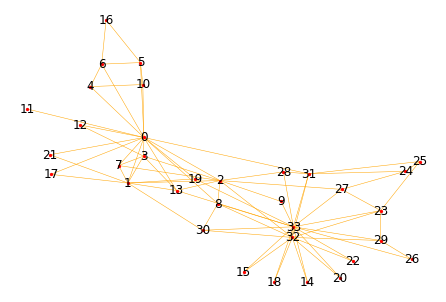

In [18]:
# fig = plt.figure(figsize=(8,8))
nx.draw(G5, pos=nx.spring_layout(G5), with_labels=True, node_color='red', node_size=5, edge_color='orange', width=0.5)
# plt.savefig("graph.png", dpi=300, facecolor='w', edgecolor='w',orientation='portrait',
#             format=None,transparent=False, bbox_inches=None, pad_inches=0.1)
plt.show()